In [53]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import MeCab

import sys
import os

In [57]:
c = CountVectorizer(min_df=2)
m = MeCab.Tagger("-Owakati")
df = pd.read_csv("../data/1.train_data.csv")
df['parsed_text'] = df.text.apply(m.parse)
c.fit(df.parsed_text)
X_train = c.transform(df.parsed_text).toarray()
df = pd.read_csv("../data/2.test_data.csv")
df['parsed_text'] = df.text.apply(m.parse)
X_test = c.transform(df.parsed_text).toarray()
Y_train = np.zeros(X_train.shape[0])
Y_test = np.ones(X_test.shape[0])
X_concat = np.concatenate([X_train, X_test], axis=0)
Y_concat = np.concatenate([Y_train, Y_test], axis=0)

x_train, x_test, y_train, y_test = train_test_split(X_concat, Y_concat, train_size=X_train.shape[0], random_state=0)

/Users/rikeda/Development/DisasterPrediction/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


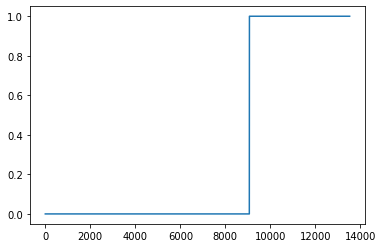

In [58]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_sorted = np.sort(y_pred, axis=0)
plt.plot(y_sorted)

In [61]:
accuracy_score(y_test, y_pred)

0.5253623188405797

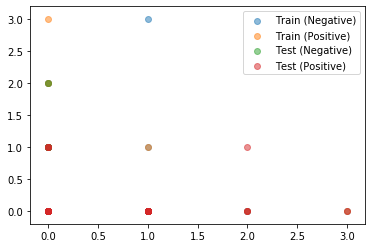

In [59]:
# 両データをプロットする
plt.scatter(x_train[y_train == 0, 0],
            x_train[y_train == 0, 1],
            alpha=0.5,
            label='Train (Negative)')
plt.scatter(x_train[y_train == 1, 0],
            x_train[y_train == 1, 1],
            alpha=0.5,
            label='Train (Positive)')
plt.scatter(x_test[y_test == 0, 0],
            x_test[y_test == 0, 1],
            alpha=0.5,
            label='Test (Negative)')
plt.scatter(x_test[y_test == 1, 0],
            x_test[y_test == 1, 1],
            alpha=0.5,
            label='Test (Positive)')
plt.legend()

In [60]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
score = cross_validate(clf, X_concat, Y_concat, cv=skf)
# 5-Fold CV で評価した精度 (Accuracy) の平均
print('Accuracy:', score['test_score'].mean())

/Users/rikeda/Development/DisasterPrediction/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rikeda/Development/DisasterPrediction/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    ht

Accuracy: 0.5278178941010434


### 精度は半分くらいなので，trainとtestの分布は変わらなさそう